# Introduction to Quantitative Finance

Copyright (c) 2019 Python Charmers Pty Ltd, Australia, <https://pythoncharmers.com>. All rights reserved.

<img src="img/python_charmers_logo.png" width="300" alt="Python Charmers Logo">

Published under the Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) license. See `LICENSE.md` for details.

Sponsored by Tibra Global Services, <https://tibra.com>

<img src="img/tibra_logo.png" width="300" alt="Tibra Logo">


## Module 1.1: Distributions and Random Processes

### 1.1.2: Distributions

Many real world phenomena can be modelled with random variables, which is particularly useful when we do not have all possible information about a given environment. Consider a die roll, where we throw a die into the air, and see which number is on top.

许多现实世界的现象可以用随机变量来建模，这在当我们没有关于给定环境的所有可能信息时特别有用。考虑一个掷骰子的例子，我们将骰子抛向空中，然后看哪个数字朝上。

The die has six possible outcomes: 1, 2, 3, 4, 5 and 6, which are the possible states or values. It is impossible* to get a value other than these six distinct possible.

<div class="alert alert-warning">
    * Some might argue that it would be possible to properly model a die throw and know what the result would be. Whether it is possible is the type of question that keeps physicists up at night, however it almost certainly would be more effort than it's worth.
</div>

Here is a simulation of a die roll.

In [1]:
import random

# 定义可能的状态列表
possible_states = [1, 2, 3, 4, 5, 6]

# 从可能的状态中随机选择一个状态
random.choice(possible_states)

3

If we run this simulation 100,000 times, we can get an *empirical estimate* of the distribution:

In [2]:
NUM_TRIALS = 100000  # 定义试验次数为100000

results = [random.choice(possible_states) for i in range(NUM_TRIALS)]  # 生成NUM_TRIALS次随机选择的结果列表

In [3]:
from collections import Counter
counts = Counter(results)  # 统计results中每个状态出现的次数
counts  # 返回统计结果

Counter({4: 16788, 3: 16779, 6: 16682, 5: 16673, 2: 16543, 1: 16535})

In [4]:
import altair as alt
alt.renderers.enable('default')  # 设置环境以显示Altair图表，此选项取决于代码运行的环境。

RendererRegistry.enable('default')

In [5]:
import pandas as pd

# 创建一个DataFrame，包含骰子的可能状态及其对应的出现次数
die_rolls = pd.DataFrame({
    'state': possible_states,
    'count': [counts.get(state, 0) for state in possible_states]
})

# 打印骰子状态的统计结果
print(die_rolls)

# 使用Altair绘制骰子状态的柱状图
alt.Chart(die_rolls).mark_bar().encode(
    x='state:O',
    y='count'
)

   state  count
0      1  16535
1      2  16543
2      3  16779
3      4  16788
4      5  16673
5      6  16682


alt.Chart(...)

As one might expect with a "fair" die roll like this, the estimates are about the same (your results may vary).

正如人们所预料的那样，对于这样一个“公平”的骰子投掷，估计值大致相同（你的结果可能会有所不同）。

More formally, we have a random variable $X$ such that the value of $X$ is the result of rolling a fair die. The distribution of $X$ is the following:


$
\begin{gather*}
  P(X=x) = \begin{cases}
  \frac{1}{6} & \text{if $x \in \{1,2,3,4,5,6\}$}\\
  0 & \text{otherwise.}
  \end{cases}
\end{gather*}
$

In this case, all options (at least, the valid ones) have the same likelihood of appearing, and therefore the resulting distribution is known as a *uniform distribution*. Uniform distributions can occur for both discrete and continuous variables.

A **discrete** variable is one that takes on a fixed set of values, such as a die roll or the month you were born. They are usually finite (i.e. there is only so many of them), but the requirement is technically that they be *countable*, which allows for infinite discrete values (think of the integers as a discrete infinite random variable).

A **continuous** variable is one that can take on an arbitrary value. As an example, the amount of liquid in a cup is continuous. It can be 350ml, or 350.1ml, or 350.1252342ml, or so on, with infinite precision (we will ignore the effect of the Planck constant). 

Distributions exist for both discrete random variables, as we saw above, and for continuous random variables, however they often behave differently.

In [6]:
%%html
<!-- 运行此代码，但无需担心其内容 - 它会使下一个单元格中的公式更大且更易读 -->
<style>
    .big_function {font-size: 200%;}
</style>

### Normal Distributions
Let's create a normal distribution, which is a continuous distribution centred around 0 and with a standard deviation of 1.

让我们创建一个正态分布，这是一个以0为中心、标准差为1的连续分布。

A normal distribution is the most commonly seen continuous distribution, and the one most people are familiar with. The equation for the graph is:

$$y = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

In [7]:
# 绘制正态分布曲线
import numpy as np
x = np.linspace(-5, 5, 1000)  # 生成从-5到5的1000个等间距点

mean = 0  # 正态分布的均值
sigma = 1  # 正态分布的标准差

# 计算正态分布的概率密度函数
y = (1 / np.sqrt(2 * np.pi * sigma ** 2)) * np.e ** -((x - mean) ** 2) / (2 * sigma ** 2)

# 将公式拆分为更易读的形式
scale_term = (1 / np.sqrt(2 * np.pi * sigma ** 2))  # 缩放项
exponent_term = ((x - mean) ** 2) / (2 * sigma ** 2)  # 指数项
y = scale_term * np.e ** -exponent_term  # 计算最终的概率密度值

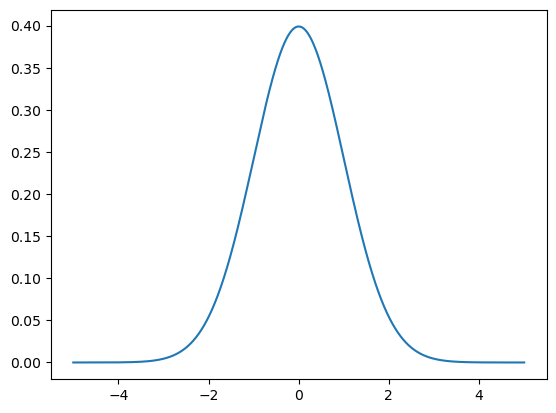

In [8]:
# 使用matplotlib绘制x和y的折线图，线条样式为实线
from matplotlib import pyplot as plt
plt.plot(x, y, "-");

In [9]:
# 导入scipy.stats模块，用于统计分析和概率分布操作
from scipy import stats

In [12]:
# 创建一个均值为0，标准差为1的正态分布对象
n = stats.norm(0, 1)

In [13]:
# 从该分布中生成10个随机变量
n.rvs(10)

array([ 0.78979692, -0.15276166,  0.71943423, -0.2591689 , -1.10966773,
        1.02108823, -0.30875752,  0.40384094, -0.44282669,  1.04180014])

In [14]:
# 注意：这里使用Counter并不太有用，因为几乎所有的计数都会是1，无论生成多少值。实际上，几乎不可能得到相同的值两次。
results = n.rvs(10)

In [15]:
Counter(results)  # 统计results中每个值的出现次数

Counter({-1.179217574844232: 1,
         -0.8368396384201529: 1,
         0.03517045797315124: 1,
         0.5619260215536434: 1,
         0.29849852245604697: 1,
         -0.8627273539924437: 1,
         -0.05178893138206906: 1,
         -1.4986073961372197: 1,
         -0.8978164723332558: 1,
         -0.7856337955270839: 1})

In [48]:
# 直方图更适合展示连续分布的数据

normal_values = pd.DataFrame({"value": n.rvs(5000)})  # 生成5000个正态分布的随机数并存入DataFrame

alt.Chart(normal_values).mark_bar().encode(
    alt.X("value", bin=alt.Bin(maxbins=100)),  # 将数据分箱，最多100个区间
    y='count()',  # 统计每个区间的数据点数量
    color=alt.value('#287E1E'),  # 设置柱状图颜色为绿色，注意使用美式拼写，可以尝试其他十六进制颜色代码
)

alt.Chart(...)


<div class="alert alert-success">
Note that Altair won't let us directly compute a histogram with more than 5000 rows. To do that, check out this example, which saves the data to a local temporary json file, and then displays from that. Without doing this, Altair embeds a *copy* of the data in a graph!

<text>
请注意，Altair 不允许我们直接计算超过 5000 行的直方图。要执行此操作，请查看此示例，该示例将数据保存到本地临时 json 文件中，然后从中显示。如果不这样做，Altair 会将数据的*副本*嵌入到图表中！
</text>


In [49]:
if not alt.data_transformers.active == 'json':  # 检查json是否已经激活
    import os
    # 创建一个临时文件夹来存放Altair生成的json文件
    dataset_temp_name = 'altair-temp-data/'
    if not os.path.exists(dataset_temp_name):
        # 如果文件夹不存在，则创建它
        os.mkdir(dataset_temp_name)
    # 告诉Altair将需要的数据集临时保存到该文件夹中
    alt.data_transformers.enable('json', prefix=dataset_temp_name)

normal_values = pd.DataFrame({"value": n.rvs(100000)})  # 生成100000个正态分布的随机数

alt.Chart(normal_values).mark_bar().encode(
    alt.X("value", bin=alt.Bin(maxbins=100)),  # 将数据分箱，最多100个箱子
    y='count()',  # 统计每个箱子中的数据数量
)

alt.Chart(...)

Notice the shape, the famous "bell curve" of the normal distribution. It's heavily centred around the mean (0) and the spread of data is indicated by the standard deviation.

<text>
注意其形状，即正态分布中著名的“钟形曲线”。它高度集中在均值（0）附近，数据的分散程度由标准差表示。
</text>


#### Exercises

1. Plot a histogram of the standard deviation with the following properties:

    1. Mean ($\mu$) of 1, standard deviation ($\sigma$) of 7
    2. $\mu=10, \sigma=1$
    3. $\mu=-10, \sigma=5$
2. Create a python function that accepts two inputs (`mean` and `standard_deviation`) and plots the histogram as per question 1.

3. Investigate the documentation of Altair and overlay these plots on top of each other, with different colours, giving a result that looks like this:
<img src="img/snapshot.png">

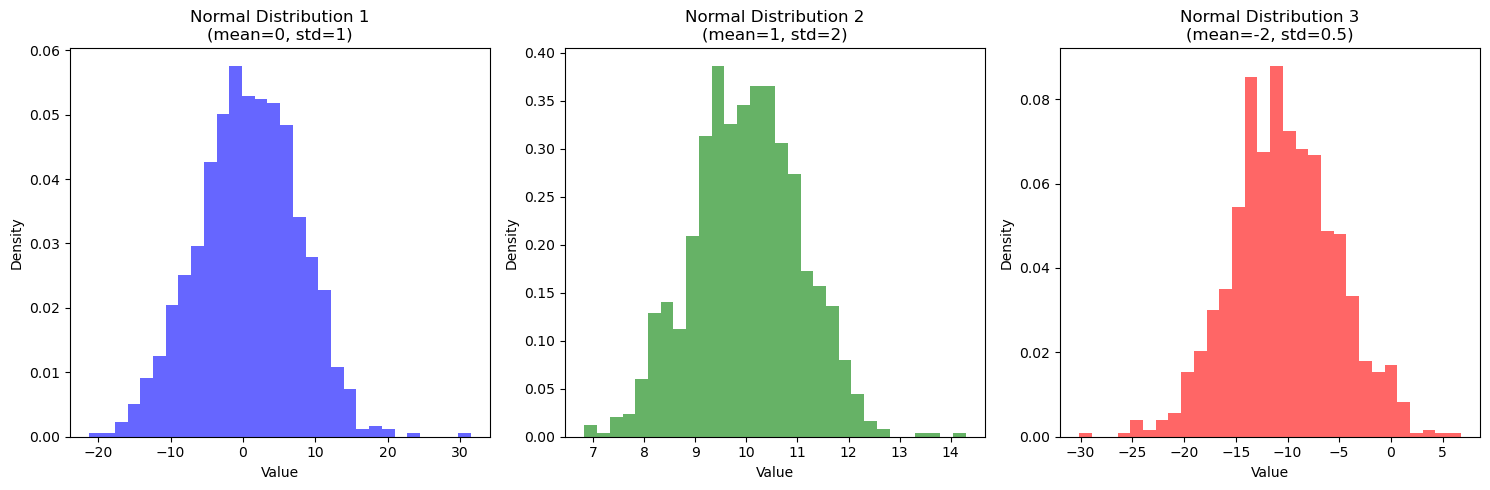

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# 定义三个正态分布的均值和标准差
mean1, std_dev1 = 1, 7  
mean2, std_dev2 = 10, 1  
mean3, std_dev3 = -10, 5  

# 生成三个正态分布的随机数据
data1 = np.random.normal(mean1, std_dev1, 1000)
data2 = np.random.normal(mean2, std_dev2, 1000)
data3 = np.random.normal(mean3, std_dev3, 1000)

# 创建一个包含三个子图的图形
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 绘制第一个正态分布的直方图
axs[0].hist(data1, bins=30, density=True, alpha=0.6, color='b')
axs[0].set_title('Normal Distribution 1\n(mean=0, std=1)')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Density')

# 绘制第二个正态分布的直方图
axs[1].hist(data2, bins=30, density=True, alpha=0.6, color='g')
axs[1].set_title('Normal Distribution 2\n(mean=1, std=2)')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Density')

# 绘制第三个正态分布的直方图
axs[2].hist(data3, bins=30, density=True, alpha=0.6, color='r')
axs[2].set_title('Normal Distribution 3\n(mean=-2, std=0.5)')
axs[2].set_xlabel('Value')
axs[2].set_ylabel('Density')

# 调整子图布局以避免重叠
plt.tight_layout()

# 显示图形
plt.show()

In [58]:
# (1)
import pandas as pd
from numpy.random import default_rng
import altair as alt
alt.renderers.enable('default')  # 启用Altair默认渲染器

mean_std_list = [(1,7), (10,1), (-10,5)]  # 定义均值和标准差的列表
rng = default_rng(2025)  # 初始化随机数生成器，设置种子为2024

for vals in mean_std_list:
    norm_dist_func = stats.norm(vals[0], vals[1])  # 创建正态分布对象
    results = rng.normal(vals[0], vals[1], 1000)  # 生成1000个正态分布随机数
    normal_values = pd.DataFrame({"value": results})  # 将结果转换为DataFrame
    norm_plot = alt.Chart(normal_values, title="Normal Distribution histogram with mean " + str(vals[0]) + " and standard deviation " + str(vals[1])).mark_bar().encode(
    alt.X("value", bin=alt.Bin(maxbins=100)),  # 设置X轴为值，并分箱
    y='count()',)  # 设置Y轴为计数
    norm_plot.display()  # 显示图表

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

In [59]:
# (2)
def display_norm(mean, std):
    # 创建正态分布对象
    norm_dist_func = stats.norm(mean, std)
    # 从正态分布中随机抽取1000个样本
    results = norm_dist_func.rvs(1000)
    # 将样本数据转换为DataFrame
    normal_values = pd.DataFrame({"value": results})
    # 使用Altair绘制正态分布的直方图
    norm_plot = alt.Chart(normal_values, title="Normal Distribution histogram with mean " + str(mean) + " and standard deviation " + str(std)).mark_bar().encode(
    alt.X("value", bin=alt.Bin(maxbins=100)),
    y='count()',)
    # 显示图表
    norm_plot.display()
    
# 调用函数，绘制均值为1，标准差为2的正态分布直方图
display_norm(1,2)

alt.Chart(...)

In [60]:
# (3) Compound Histogram Altair
# 创建一个包含三个正态分布样本的DataFrame
df = pd.DataFrame({'Norm 1': stats.norm(1,7).rvs(6000),
                   'Norm 2': stats.norm(10,1).rvs(6000),
                   'Norm 3': stats.norm(-10,5).rvs(6000)})

# 使用Altair绘制复合直方图
alt.Chart(df).transform_fold(
    ['Norm 1', 'Norm 3'],  # 将指定的列折叠为键值对
    as_=['Columns', 'Values']  # 指定新列的名称
).mark_area(
    opacity=0.8,  # 设置透明度
    interpolate='step'  # 设置插值方式为阶梯状
).encode(
    alt.X('Values:Q', bin=alt.Bin(maxbins=300)),  # 对值进行分箱处理
    alt.Y('count()', stack=None),  # 计算每个分箱的计数，不堆叠
    alt.Color('Columns:N'))  # 根据列名设置颜色

alt.Chart(...)

*For solutions, see `solutions/normal_distributions.py`*

### Probability Density Functions

The histograms we were looking at above are approximations of what is known as a *Probability Density Function*, or PDF. A PDF shows us the probability of a given value, for a discrete random variable.

For a continuous random variable, any *exact* value has a probability of 0 (think about why this is the case). We can only give probabilities for ranges. For a lower bound of $a$ and an upper bound of $b$, we can obtain the probability of a random value lying between $a$ and $b$ by integrating the PDF between those values. For example, if our PDF function is $f(x)$, then the probability of random variable $X$ lying between $a$ and $b$ is given by:

<text>
对于连续随机变量，任何*精确*值的概率都为0（思考一下为什么会这样）。我们只能给出某个范围内的概率。对于下界$a$和上界$b$，我们可以通过对PDF在这些值之间进行积分来获得随机值落在$a$和$b$之间的概率。例如，如果我们的PDF函数是$f(x)$，那么随机变量$X$落在$a$和$b$之间的概率由以下公式给出：
</text>

$P[a <= X <= b] = \int_a^b f(x) dx$

As an aside, and very informally, you can think of "the probability of $X=2$" as being a range *about* 2, say any value between 1.99 and 2.01 (or whatever precision makes sense in the context). Be clear on this definition when you do go to present your findings though, as a formal definition will be needed to replicate your results.

We can generate the PDF through the `.pdf` method on a `scipy.stats` distribution. Earlier in this notebook we computed this manually through the equation. Now we let a library do the work for us.

In [61]:
n = stats.norm(0, 1)  # 创建一个均值为0，标准差为1的正态分布对象

In [62]:
n  # 标准正态分布对象，均值为0，标准差为1

In [63]:
# 生成从-4到4的1000个等间距点
x = np.linspace(-4, 4, 1000)
# 计算标准正态分布在x点的概率密度函数值
y = n.pdf(x)

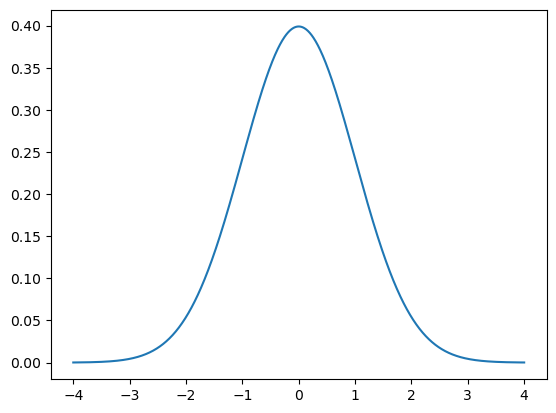

In [64]:
# 绘制正态分布的概率密度函数曲线
plt.plot(x, y);

As with all probabilities, the sum or integral of the probabilities of all possible outcomes must equal one. In a die roll, each outcome (1, 2, 3, 4, 5, 6) has an probability of $\frac{1}{6}$. Summed, that equals one.

In a continuous scenario, the *area under the curve* must sum to 1.0 across the full range. That is:

$\int_{-\infty}^{\infty}f(x)dx = 1$

<div class="alert alert-warning">
    Note that the value $f(x)$ is not a probability! It might look like one, but it's the <i>area under the curve</i> that gives us the probability.
</div>

For a given function, if it is positive or 0 everywhere, and the area under the curve integrates to 1, the function is a valid probability density function.

Some functions are valid only under a given domain. For instance, the function $y = ax(b-x)$ is only positive for $0<=x<=b$. In this case, if the area under the curve sums to 1 across that domain, the function is a valid PDF for that domain.



#### Exercises
Using three different distribution classes in `scipy.stats`, run the following experiment:

1. Compute 10,000 random values. Compute and save the mean.
2. Repeat step 1, 1,000 times
3. Plot the histogram of the mean values and observe the shape.

Use the distributions `norm`, `cosine` and `uniform`.

This finding is why the normal distribution is so important, and so commonly found in nature.

**Hint:** See this example for how to do independent axes with Altair: https://altair-viz.github.io/gallery/layered_plot_with_dual_axis.html?highlight=resolve_scale

#### Extended exercise

Load a random dataset, and perform the same exercise with the real world data - that is, take the mean of each of 1,000 samples of size 10,000 and plot the histogram. What shaped distribution does it look like?

In [65]:
# (1)

def get_rv_sample_mean(distribution, n_sample = 10000):
    # 从给定分布中抽取n_sample个样本，并返回样本的均值
    samp = distribution.rvs(n_sample)
    return samp.mean()


def list_of_means(distribution, n_means = 1000, n_sample = 10000):
    # 生成n_means个样本均值，每个均值基于n_sample个样本
    samp_means = []
    for i in range(n_means):
        samp_means.append(get_rv_sample_mean(distribution, n_sample))
    return samp_means


# 定义三种不同的分布：正态分布、泊松分布和均匀分布
distributions = dict([("normal", stats.norm(0,1)),
                 ("poisson", stats.poisson(1,1)),
                 ("uniform", stats.uniform(0, 1))
                ])


# 为每种分布生成样本均值，并存储在DataFrame中
means = pd.DataFrame({distribution_name: list_of_means(distribution)
                  for distribution_name, distribution in distributions.items()})


# 对每种分布的样本均值绘制直方图
for dist in distributions:
    nplot = alt.Chart(means[[dist]]).mark_bar().encode(alt.X(dist, bin=alt.Bin(maxbins=100)), y='count()',)
    nplot.display()

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

*For solutions, see `solutions/plotting_distributions.py`*

### Cumulative Density Function

A cumulative density function (CDF) tells us the probability of a value being less than, or equal to, a given value. A CDF is normally more useful for everyday usage.

Here is the CDF for the normal distribution:

In [66]:
# 创建一个标准正态分布对象，均值为0，标准差为1
distribution = stats.norm()

In [67]:
# 生成从-5到5的1000个等间距点
x = np.linspace(-5, 5, 1000)
# 计算这些点在正态分布下的累积分布函数值
y_cdf = distribution.cdf(x)

In [68]:
# 绘制正态分布的累积分布函数曲线


This graph allows us to compute the probability that a random value is chosen from the normal distribution ($\mu=0, \sigma=1$) will be less than or equal to the given $x$ value.

For example, to determine the probability a given value is less than or equal to 1.2, we find the $y$ value corresponding to the given $x$ value:

At x=1.2, y=0.885


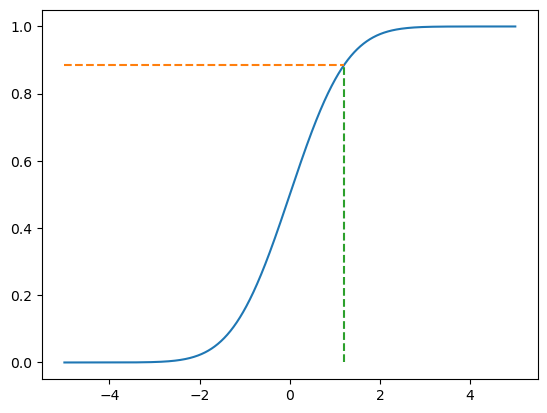

In [69]:
x_0 = 1.2  # 设置x轴上的特定点
y_0 = distribution.cdf(x_0)  # 计算该点在CDF上的y值

plt.plot(x, y_cdf)  # 绘制CDF曲线
plt.plot([x[0], x_0], [y_0, y_0], '--')  # 绘制水平虚线，从曲线起点到x_0对应的y值
plt.plot([x_0, x_0], [0, y_0], '--')  # 绘制垂直虚线，从x轴到x_0对应的y值
print("At x={0}, y={1:.3f}".format(x_0, y_0))  # 打印x_0和对应的y值

Some major properties of a CDF, defined as $F_X(x)$ are:
 
* The range (the values y can take) are between (and including) 0 and 1. This comes from its use as a probability computation - see the next point. Formally, $0 <= F_X(x) <= 1$ for any value $x$
* The likelihood a value is less than or equal to infinity must be 1, and the likelihood it is less than or equal to negative infinity must be 0. Formally, $F_X(-\infty)=0$ and $F_X(\infty)=1$
* The CDF value is *increasing*. That is, it must have a positive or zero slope (but not a negative one). Formally, $F_X(a) <= F_X(b) \text{ iff } a < b$
 
Further, if your random variable has a domain, then the CDF is 0 for all values less than the minimum domain, and 1 for any value above the maximum of the domain.

To find the probability that a random variable lies within a range, subtract the value of the CDF at the minimum from the value at the maximum:

$P(a < X <= b) = F_X(b) - F_X(a)$

For a continuous distribution (like the normal distribution), the CDF is a smooth graph. Its shape will vary, but will follow the general pattern as seen above.

For a discrete distribution, the graph is still increasing, but represents a "staircase", where the value of $F_X(x)$ between valid values remains the same. For example, for a die roll, the value of $F_X(3) == F_X(3.1)$. This makes sense, as no values between 3.0 and 3.1 can be obtained on a die, so the value $P(X<=3)$ must be the same as $P(X<=3.1)$.

#### Exercises

1. Plot the relationship between the mean of a normal distribution as $x$ (with a fixed standard deviation of 1), and the area under the curve between 0 and 1 as the $y$ axis.
2. Remake the plot, but have the standard deviation vary as $x$, and the mean fixed as 0. How can you characterise the relationship?

#### Extended exercise

Plot the CDF for rolling two dice, where the x value is the sum of the two dice, and the y value is the CDF for the distribution.

The area between 0 and 1 decreases as the standard deviation increases are values will spread out and hence have less between 0 and 1.


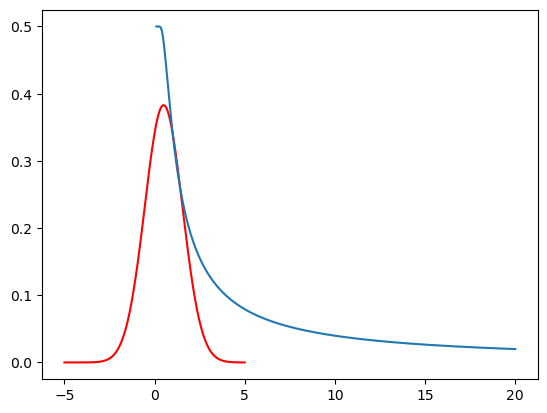

In [70]:
# Exercise 1
# 生成从-5到5的1000个等间距点
x_values_1 = np.linspace(-5, 5, 1000)
# 为每个x值创建一个均值为x，标准差为1的正态分布
distributions_1 = [stats.norm(x, 1) for x in x_values_1]
# 计算每个分布在0到1之间的累积概率差
y_1 = np.array([distribution.cdf(1) - distribution.cdf(0)
               for distribution in distributions_1])
# 绘制x值与对应的累积概率差的关系图，使用红色线条
plt.plot(x_values_1, y_1, "r")

# Exercise 2
# 生成从0.1到20的1000个等间距点
x_values_2 = np.linspace(0.1, 20, 1000)
# 为每个x值创建一个均值为0，标准差为x的正态分布
distributions_2 = [stats.norm(0, x) for x in x_values_2]
# 计算每个分布在0到1之间的累积概率差
y_2 = np.array([distribution.cdf(1) - distribution.cdf(0)
               for distribution in distributions_2])
# 绘制x值与对应的累积概率差的关系图
plt.plot(x_values_2, y_2)
# 打印解释：随着标准差的增加，0到1之间的面积减少，因为值会分散，因此在0到1之间的值会减少
print("The area between 0 and 1 decreases as the standard deviation increases are values will spread out and hence have less between 0 and 1.")

*For solutions, see `solutions/cdf_relationships.py`*